In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
num_classes = 10
y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]

In [ ]:
  print('No of images in training set {}'.format(x_train.shape))
  print('No of labels in training set'.format(y_train.shape))
  print('No of images in test set {}'.format(x_test.shape))
  print('No of labels in test set {}'.format(y_test.shape))

No of images in training set (60000, 28, 28)
No of labels in training set
No of images in test set (10000, 28, 28)
No of labels in test set (10000, 10)


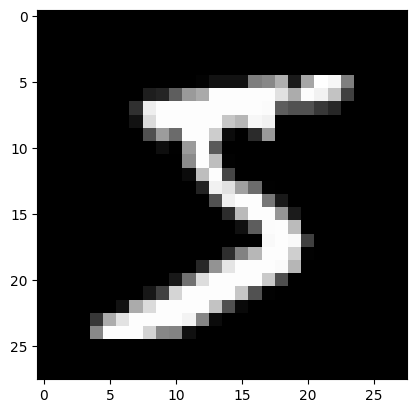

In [ ]:
img1 = x_train[0].reshape(28, 28)
plt.imshow(img1, cmap='gray')

In [ ]:
num_input = 784
num_hidden1 = 512
num_hidden2 = 256
num_hidden3 = 128
num_output = 10

In [ ]:
with tf.name_scope('input'):
  X = tf.placeholder("float", [None, num_input])
with tf.name_scope('output'):
  Y = tf.placeholder("float", [None, num_output])

In [ ]:
with tf.name_scope('weights'):
  weights = {
      'w1': tf.Variable(tf.truncated_normal([num_input, num_hidden1], stddev=0.1), name='weight_1'),
      'w2': tf.Variable(tf.truncated_normal([num_hidden1, num_hidden2], stddev=0.1), name='weight_2'),
      'w3': tf.Variable(tf.truncated_normal([num_hidden2, num_hidden3], stddev=0.1), name='weight_3'),
      'out': tf.Variable(tf.truncated_normal([num_hidden3, num_output], stddev=0.1), name='weight_4'),
  }
  with tf.name_scope('biases'):
    biases = {
        'b1': tf.Variable(tf.constant(0.1, shape=[num_hidden1]), name='bias_1'),
        'b2': tf.Variable(tf.constant(0.1, shape=[num_hidden2]), name='bias_2'),
        'b3': tf.Variable(tf.constant(0.1, shape=[num_hidden3]), name='bias_3'),
        'out': tf.Variable(tf.constant(0.1, shape=[num_output]), name='bias_4')
    }

In [ ]:
with tf.name_scope('Model'):
    layer_1 = tf.nn.relu(tf.add(tf.matmul(X, weights['w1']), biases['b1']))
    layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights['w2']), biases['b2']))
    layer_3 = tf.nn.relu(tf.add(tf.matmul(layer_2, weights['w3']), biases['b3']))
    logits = tf.matmul(layer_3, weights['out']) + biases['out']
    y_hat = tf.nn.softmax(logits)

with tf.name_scope('Loss'):
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))

In [ ]:
optimizer = tf.train.AdamOptimizer(1e-4).minimize(loss)

In [ ]:
with tf.name_scope('Accuracy'):
    predicted_digit = tf.argmax(y_hat, 1)
    actual_digit = tf.argmax(Y, 1)
    correct_pred = tf.equal(predicted_digit, actual_digit)
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [ ]:
tf.summary.scalar("Accuracy", accuracy)
tf.summary.scalar("Loss", loss)
merge_summary = tf.summary.merge_all()

In [ ]:
init = tf.global_variables_initializer()
batch_size = 128
num_iterations = 1000

In [ ]:
# training
with tf.Session() as sess:
    sess.run(init)
    summary_writer = tf.summary.FileWriter('./graphs', graph=tf.get_default_graph())

    for i in range(num_iterations):
      # mini-batch
      idx = np.random.choice(x_train.shape[0], size=batch_size)
      batch_x = x_train[idx].reshape(batch_size, num_input) # Flatten the images
      batch_y = y_train[idx]

      sess.run(optimizer, feed_dict={X: batch_x, Y: batch_y})
      if i % 100 == 0:
        batch_loss, batch_accuracy, summary = sess.run([loss, accuracy, merge_summary], feed_dict={X: batch_x, Y: batch_y})
        summary_writer.add_summary(summary, i)
        print('Iteration: {}, Loss: {}, Accuracy: {}'.format(i, batch_loss, batch_accuracy))

Iteration: 0, Loss: 199.14791870117188, Accuracy: 0.1875
Iteration: 100, Loss: 18.32231903076172, Accuracy: 0.6796875
Iteration: 200, Loss: 3.3764333724975586, Accuracy: 0.8828125
Iteration: 300, Loss: 8.594877243041992, Accuracy: 0.84375
Iteration: 400, Loss: 9.17015266418457, Accuracy: 0.828125
Iteration: 500, Loss: 4.930289268493652, Accuracy: 0.890625
Iteration: 600, Loss: 2.767245292663574, Accuracy: 0.890625
Iteration: 700, Loss: 7.976657867431641, Accuracy: 0.8671875
Iteration: 800, Loss: 3.780390739440918, Accuracy: 0.9453125
Iteration: 900, Loss: 2.2816953659057617, Accuracy: 0.9375
